<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
# 1.1.1 Load the file with the csv module

import csv
rows = []
sat_scores_file = './data/sat_scores.csv'
with open(sat_scores_file,'r') as S:
    reader = csv.reader(S)
    for row in reader:
        rows.append(row)
S.close()

In [3]:
# 1.1.2 Seperate header and data
header=rows[0]
data=rows[1:]
# header = rows[0]
print(header)
print(data[0])

['State', 'Rate', 'Verbal', 'Math']
['CT', '82', '509', '510']


In [4]:
# 1.1.3 write a function to put the data in a Python dictionary

def create_dict(header,data):
    sat_dict = {}
    for inx, col in enumerate(header):
        sat_dict[col] = [row[inx] for row in data]
    return sat_dict

sat_dictionary = create_dict(header,data)
sat_dictionary


{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': ['82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4',
  '45'],
 'Verbal': ['509',
  '499',
  '511',
  '495',
  '520',
  '501',
  '500',
  '511',
  '506',
  '510',
  '501',
  '508',
  '493',
  '491',
  '499',
  '486',
  '482',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
# Make a pandas DataFrame object with the SAT dictionary
sat_with_dict = pd.DataFrame.from_dict(sat_dictionary)
sat_with_dict.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [6]:
# Make another pandas DataFrame object with the pandas .read_csv() function
sat_scores = pd.read_csv('./data/sat_scores.csv')
sat_scores.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [7]:
# Compare the DataFrames using the .dtypes attribute in the DataFrame objects
print('Data types of sat_with_dict:')
print(sat_with_dict.dtypes)
print('-----------------------------------------------')
print('Data types of sat_scores:')
print(sat_scores.dtypes)

Data types of sat_with_dict:
State     object
Rate      object
Verbal    object
Math      object
dtype: object
-----------------------------------------------
Data types of sat_scores:
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


#### 'What is the difference between loading from file and inputting this dictionary?'
Answer: All of the columns in the DataFrame object with the SAT dictionary are of object type. If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). While the columns except'State' are int type in the DataFrame that loaded with pd.read_csv() function.

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [8]:
# Show the first ten rows of the DataFrame
sat_scores.head(10).T

,0,1,2,3,4,5,6,7,8,9
State,CT,NJ,MA,NY,NH,RI,PA,VT,ME,VA
Rate,82,81,79,77,72,71,71,69,69,68
Verbal,509,499,511,495,520,501,500,511,506,510
Math,510,513,515,505,516,499,499,506,500,501


### What does the data describe?
Answer:\
1) State: The state of U.S.\
2) Rate: The overall SAT test score.\
3) Verbal: The SAT score on Verbal section.(SAT Verbal was the traditional term for the SAT Reading section. Before 2005, the SAT had only two sections: Verbal and Math.)\
4) Math: The SAT score on Mathematics section.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [9]:
# Dictionary1:Create a 'data dictionary' base on the data
sat_scores_dict = dict(
                        column_names = ['State','Rate','Verbal','Math'],
                        column_types = ['Object','int64','int64','int64'],
                        descriptions = ['The state of the U.S.',
                                        'The overall SAT test score.',
                                        'The SAT score on Verbal section.',
                                        'The SAT score on Mathematics section'],
                        DataFrame_shape = sat_scores.shape
                        )
sat_scores_dict

{'column_names': ['State', 'Rate', 'Verbal', 'Math'],
 'column_types': ['Object', 'int64', 'int64', 'int64'],
 'descriptions': ['The state of the U.S.',
  'The overall SAT test score.',
  'The SAT score on Verbal section.',
  'The SAT score on Mathematics section'],
 'DataFrame_shape': (52, 4)}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [10]:
# Import seaborn library
import seaborn as sns

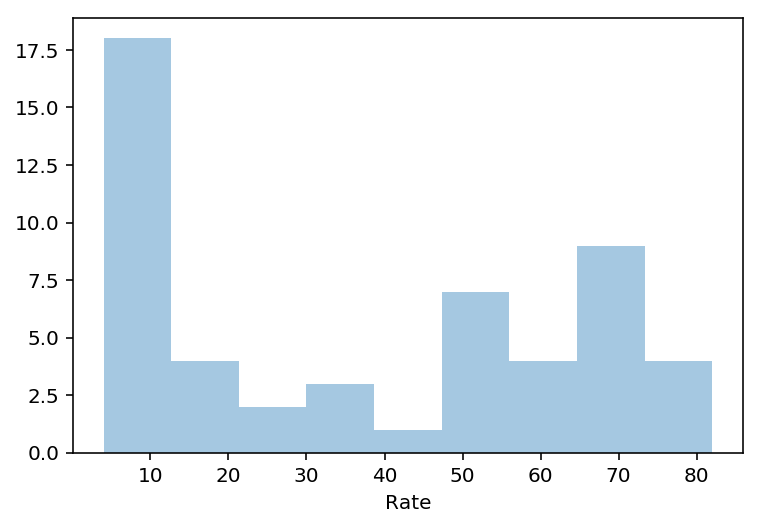

In [11]:
# Plot the distribution for 'Rate'
sns.distplot(sat_scores['Rate'], kde=False, bins=9)

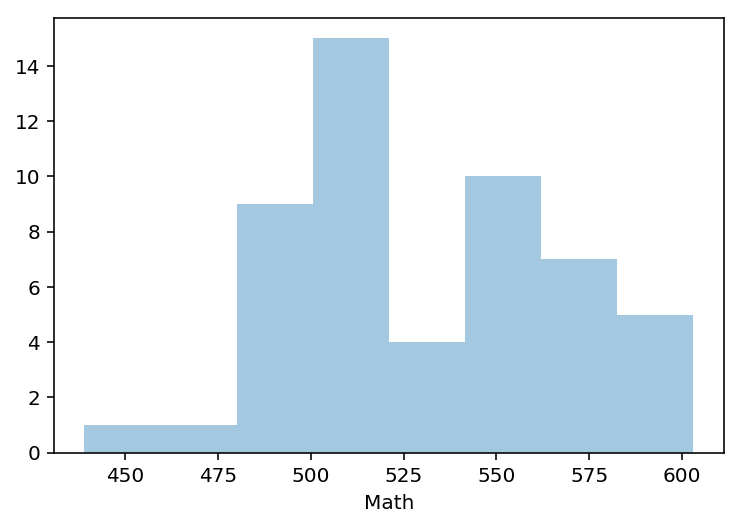

In [12]:
# Plot the distribution for 'Math'
sns.distplot(sat_scores['Math'], kde=False, bins=8)

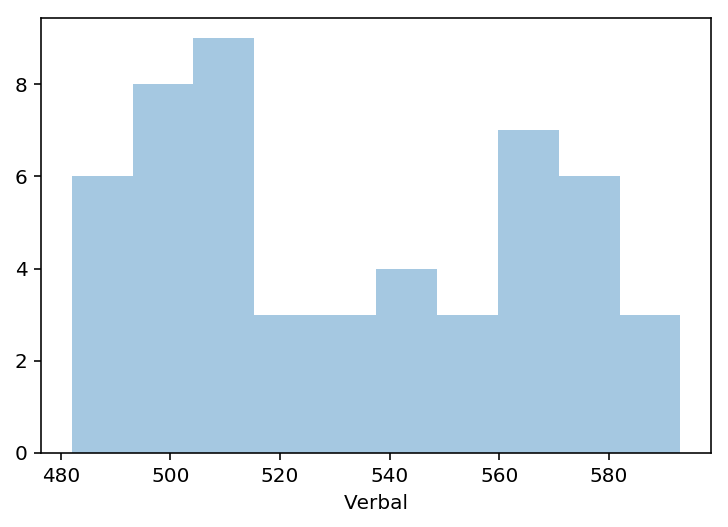

In [13]:
# Plot the distribution for 'Verbal'
sns.distplot(sat_scores['Verbal'], kde=False, bins=10)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

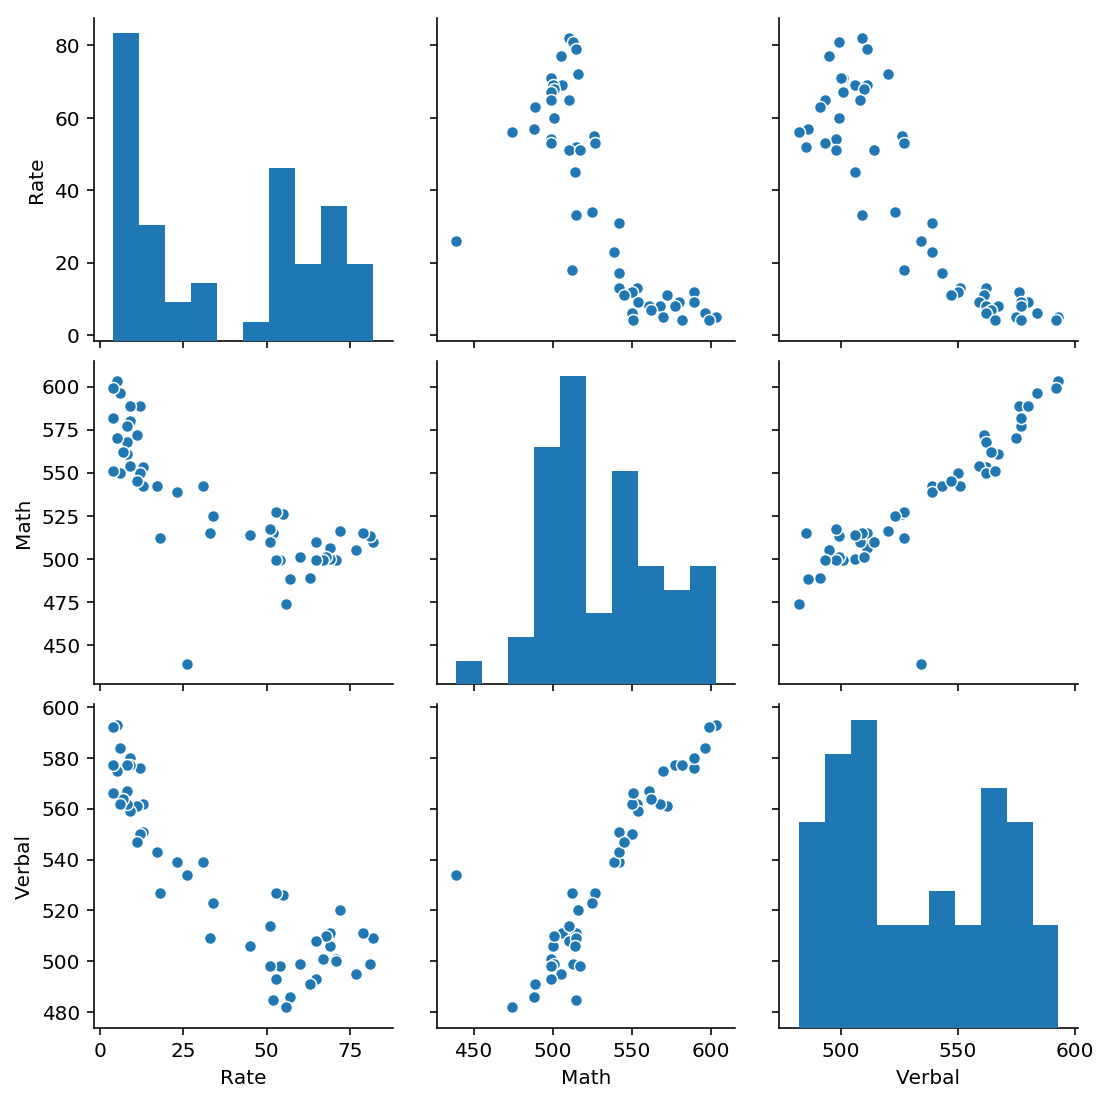

In [14]:
# Plot the joint distributions for each of Rate, Math, and Verbal
sns.pairplot(sat_scores[['Rate','Math','Verbal']])

# Explain the data
1) The subplots at the left top, middle, and the right bottom are the distributions of 'Rate','Math',and 'Verbal'.\
2) The subplot at the 1st row and the 2nd column: It is a scatter plot with 'Rate' in x-axis and 'Math' in y-axis. It shows that data in columns 'Rate' and 'Math' has a certain level of negative linear relation.\
3) The subplot at the 1st row and the 3rd column: It is a scatter plot with 'Rate' in x-axis and 'Verbal' in y-axis. It shows that data in columns 'Rate' and 'Verbal' has a certain level of negative linear relation.\
4) The subplot at the 2nd row and the 1st column: It is a scatter plot with 'Math' in x-axis and 'Rate' in y-axis. It shows that data in columns 'Math' and 'Rate' has a certain level of negative linear relation.\
5) The subplot at the 2nd row and the 3rd column: It is a scatter plot with 'Math' in x-axis and 'Verbal' in y-axis. It shows that data in columns 'Math' and 'Verbal' has a strong positive linear relation.\
6) The subplot at the 3rd row and the 1st column: It is a scatter plot with 'Verbal' in x-axis and 'Rate' in y-axis. It shows that data in columns 'Verbal' and 'Rate' has a certain level of negative linear relation.\
7) The subplot at the 3rd row and the 2nd column: It is a scatter plot with 'Verbal' in x-axis and 'Math' in y-axis. It shows that data in columns 'Verbal' and 'Math' has a strong positive linear relation.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

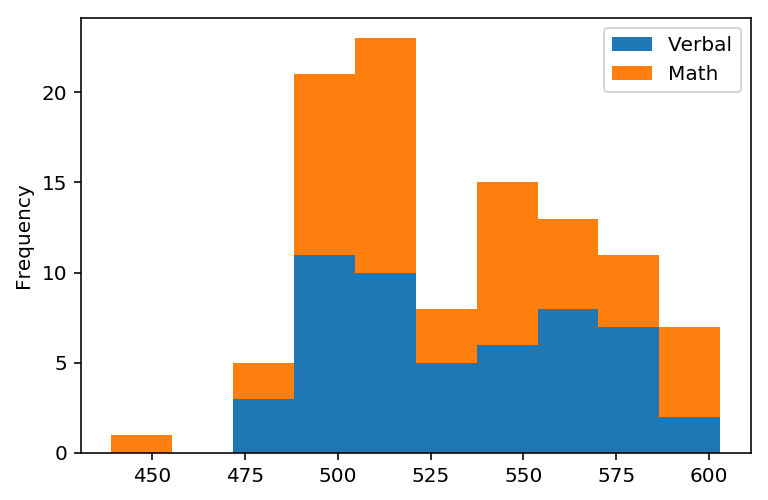

In [15]:
# Plot a stacked histogram with 'Verbal' and 'Math'
sat_scores[['Verbal','Math']].plot(kind='hist', stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

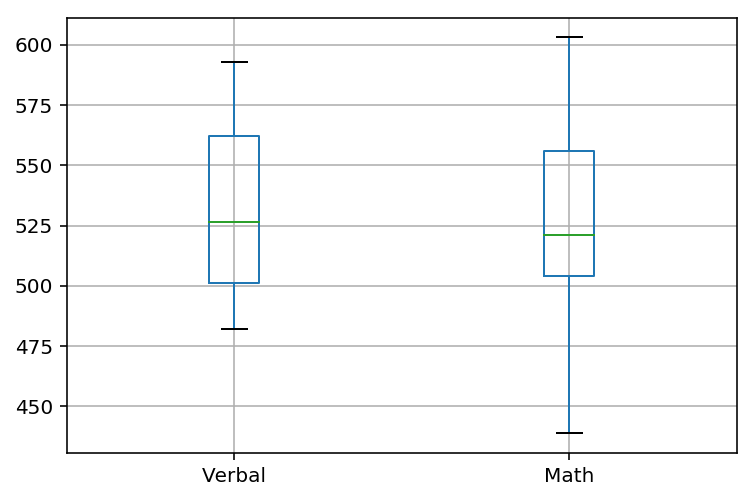

In [16]:
# Plot 'Verbal' and 'Math' on the same chart using boxplots
sat_scores[['Verbal', 'Math']].boxplot(figsize=(6,4))

#### What are the benefits of using a boxplot as compared to a scatterplot or a histogram?
Answer: Boxplot makes it easier to find out if there is any outlier. 

#### What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal?

From the boxplot below, we can see that the boxplots are hard to visualize together since 'Rate' is on different 
scale from the scale of 'Math'and 'Verbal'.

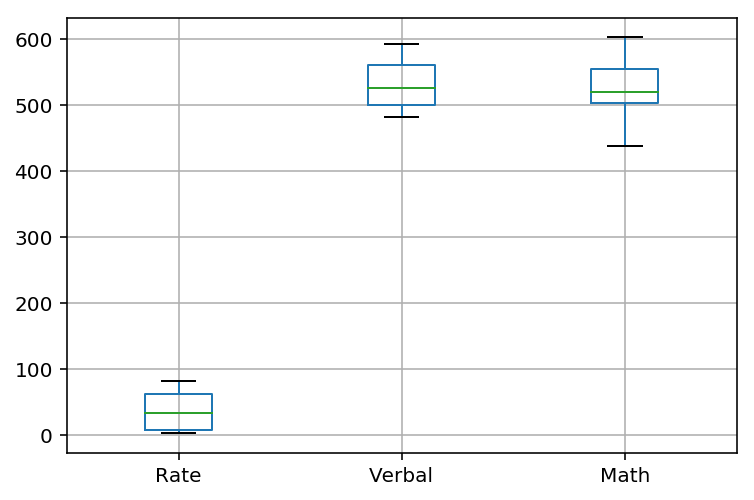

In [17]:
sat_scores.boxplot(figsize=(6,4))

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


#### In order to plot all variables on the same boxplot chart, we can consider the following:

rescale the variables (the procedure called "standardization") to forces the distribution of each variable to have 
a mean of 0 and a standard deviation of 1. The calculation would be as follow:

standardized_variable = (variable - mean_of_variable) / std_dev_of_variable


In [18]:
# Firstly, create a subset that only contains the three numeric columns 'Rate','Math' and 'Verbal'
subset_data = sat_scores[['Rate','Math','Verbal']]

# Secondly, create a standardized version of the data
stand_subset_data= (subset_data - subset_data.mean())/ subset_data.std()

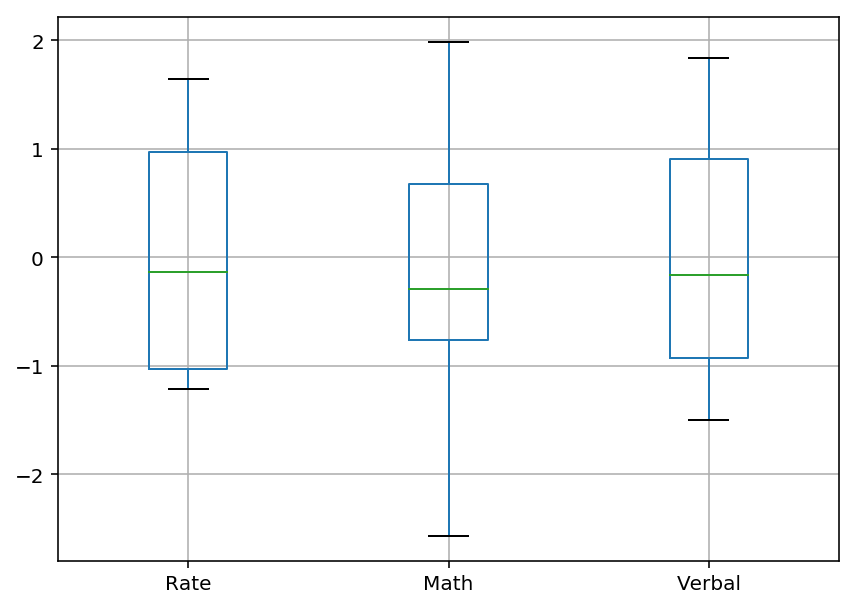

In [19]:
# Finally, re-create the boxplot with the standardized data
stand_subset_data.boxplot(figsize=(7,5))

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [20]:
# Firstly calculate the average Verbal scores across states
avg_verbal = sat_scores['Verbal'].mean()

# Then create the list that meet the condition mentioned in the question.
states_above_verbal_mean = list(sat_scores[sat_scores['Verbal'] > avg_verbal]['State'].unique())

# print the result
print('mean:', avg_verbal)
print(len(states_above_verbal_mean), 'states are above the mean.')

mean: 532.0192307692307
24 states are above the mean.


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [21]:
# Firstly calculate the average Verbal scores across states
median_verbal = sat_scores['Verbal'].median()

# Then create the list that meet the condition mentioned in the question.
states_above_verbal_median = list(sat_scores[sat_scores['Verbal'] > median_verbal]['State'].unique())

# print the result
print('median:', median_verbal)
print(len(states_above_verbal_median), 'states are above the median.')

median: 526.5
26 states are above the median.


In [22]:
# There are two more states than in the list of states that have Verbal scores greater than mean of Verbal scores 
# across states. Because the median of Verbal is lower than the mean.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [23]:
# Create a column that is the difference between the Verbal and Math scores
sat_scores['Diff_v_m'] = sat_scores['Verbal'] - sat_scores['Math']
sat_scores['Diff_v_m'].head()

0    -1
1   -14
2    -4
3   -10
4     4
Name: Diff_v_m, dtype: int64

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [24]:
# Create a new DataFrame that contains the top 10 states with the greatest gap between Verbal and Math where Verbal 
# is greater than Math.
Top_gaps_v_m = sat_scores.sort_values('Diff_v_m', ascending=False).head(10)

# Print the header of the new DataFrame with only the top 3 states in it.
Top_gaps_v_m.head(3)

,State,Rate,Verbal,Math,Diff_v_m
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [25]:
# Create a new DataFrame that contains the top 10 states with the greatest gap between Verbal and Math such that Math
# is greater than Verbal.
Top_gaps_m_v = sat_scores.sort_values('Diff_v_m', ascending=True).head(10)

# Print the header of the new DataFrame with only the top 3 states in it.
Top_gaps_m_v.head(3)

,State,Rate,Verbal,Math,Diff_v_m
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [26]:
# Create the correlation matrix
sat_scores.corr()

,Rate,Verbal,Math,Diff_v_m
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Diff_v_m,-0.101412,0.052600,-0.388219,1.000000


#### What does the correlation matrix tell you?

Answer:
The correlation matrix tells the following:

1) Rate has a strong negative correlation with Verbal and Math. The higher the Verbal or Math scores, the smaller number Rate is. And smaller numer means better rating in this case.\
2) There is a strong positive correlation between Verbal and Math. It means that for those states that have got a high score in Verbal, they also performed well in Math.\
3) The correlation between Math and Diff_v_m is stronger than the one between Verbal and Diff_v_m, that means different states has performed more differently in Math than Verbal.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [27]:
# Apply pandas .describe() on the DataFrame
sat_scores.describe()

,Rate,Verbal,Math,Diff_v_m
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


#### What each of the rows returned by the function indicate?
Answer:\
1) count - The count of the values in each column. In this case, 52 values in each column.\
2) mean - The average of the values in each column. \
3) std - The standard deviation of each column's values.\
4) min - The lowerst score in each column.\
5) 25% - The first percentile of the ascendingly sorted values in each column. \
6) 50% - The median of the scores in each column.\
7) 75% - The third percentile of the ascendingly sorted values in each column. \
8) max - The highest score in each column.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [28]:
# Covariance matrix of the dataset
sat_scores.cov()

,Rate,Verbal,Math,Diff_v_m
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Diff_v_m,-43.552036,27.499623,-219.931373,247.430995


#### How the covariance matrix is different from the correlation matrix?
 Answer:\
        Covariance measures how two variables move with respect to each other. It indicates the direction of the linear relationship between variables. “Correlation” on the other hand quantifies the relationship between two variables. It measures both the strength and direction of the linear relationship between two variables.

#### What is the process to convert the covariance into the correlation?
Answer:\
Correlation of x,y = covariance of x,y / standard deviation of x * standard deviation of y

#### Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?
Answer:\
Covariance defines the type of interaction, but correlation defines not only the type but also the strength of this relationship. And Correlation remains unaffected by the change in location and scale, since it is limited to a range of -1 to +1, it is useful to draw comparisons between variables across domains. Base on these reasons, correlation is preferred over covariance in many cases.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [29]:
# Load the data using pandas
drug_use = pd.read_csv('./data/drug-use-by-age.csv')
drug_use.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [30]:
# Check the shape of the DataFrame
drug_use.shape

(17, 28)

In [31]:
# Check info of the Dataset
drug_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        17 non-null     object 
 8   crack-use                17 non-null     float64
 9   crack-frequency          17 non-null     object 
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         17 non-null     object 
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

In [32]:
# From the info of the dataset, some columns' data types look not being proper.  
# As the DataFrame has only 17 rows, we can have a further look at the whole DataFrame.
drug_use

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


### From the above DataFrame, the following changes need to be made so that the data is clean and suitable for analizing.
1. Some of the values in column 'age' are a scope which made the column an object type. The values need to be turned into a single numer for each. And the 'age' column should be of float data type.
2. Some columns contain '-' which suppose represent data unavailable. These '-' need to be replaced with 0, so that the columns can be converted to numeric data type. 

In [33]:
# Clean the 'age' column, use average age for those age range values, and made the '65+' just 65.

# First, write a function that calculate the average value of a list
def Average(lst): 
    return sum(lst) / len(lst)

# Second, generate a values list from 'age' column
age_values = list(drug_use['age'].values)

# write a for loop to clean the data
for inx, v in enumerate(age_values):
    # if the value is a scope and contains '-'
    if '-' in v:
        # split the string by '-'
        aa = v.split('-') 
        # turn the values of the splited string into float type
        bb = [float(s) for s in aa] 
        # use the defined function 'Average' to calculate the average age, and then make it the value of the column 'age'
        age_values[inx] = Average(bb)  
    # Otherwise, if the value is a scope and contains '+'
    elif '+' in v:
        age_values[inx] = float(v.replace('+',''))
    # Otherwise, if the value can be converted to a float directly
    else:
        age_values[inx] = float(v)

# Finally, assign the cleaned values back to the 'age' column.
drug_use['age'] = age_values

In [34]:
# Check again to see if the 'age' column has been converted to what we expected
drug_use['age']

0     12.0
1     13.0
2     14.0
3     15.0
4     16.0
5     17.0
6     18.0
7     19.0
8     20.0
9     21.0
10    22.5
11    24.5
12    27.5
13    32.0
14    42.0
15    57.0
16    65.0
Name: age, dtype: float64

In [35]:
# For the columns with '-' represent missing values, replace '-' with 0
# Firstly, replace '-' with 0
drug_use.replace('-', '0', inplace=True)

In [36]:
# Secondly, create a list of column names that we are going to convert their data type
to_convert_list =['cocaine-frequency', 'crack-frequency','heroin-frequency','inhalant-frequency',
                  'oxycontin-frequency','meth-frequency']

# Third, convert the data type
for col in to_convert_list:
    drug_use[col] = drug_use[col].astype(float)

In [37]:
# Check again the data type of the columns
drug_use.dtypes

age                        float64
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [38]:
# round up 'age' column and make it int type
drug_use['age'] = [int(round(i)) for i in drug_use['age']]

In [39]:
# set 'age' column as index
drug_use.set_index('age', drop=True)

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
age,,,,,,,,,,,,,,,,,,,,,
12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,0.1,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,0.1,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0


In [40]:
# Generate some subsets for faciliating the analysis
# subset that exclude '.*frequency'
subset_without_frequency = drug_use.filter(regex=('^(age|n|.*use)$'))

# subset of all 'use'
use_subset = drug_use.filter(regex='use')

# subset of all 'frequency'
frequency_subset = drug_use.filter(regex='frequency')


In [41]:
# Have a look at the statistic by .describe()
drug_use.describe()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,25.588235,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.411765,0.294118,12.382353,...,0.935294,13.941176,2.805882,11.735294,1.917647,31.147059,0.382353,31.735294,0.282353,19.382353
std,15.370665,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.014119,0.235772,17.361532,...,0.608216,12.902134,1.753379,11.485205,1.407673,85.973790,0.262762,32.206423,0.138000,24.833527
min,12.000000,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
25%,16.000000,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,2.000000,...,0.400000,5.000000,1.400000,6.000000,0.600000,7.000000,0.200000,10.500000,0.200000,6.500000
50%,20.000000,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.000000,0.400000,6.000000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,24.000000,0.300000,10.000000
75%,28.000000,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.000000,0.500000,15.000000,...,1.400000,17.500000,4.200000,11.000000,3.000000,12.000000,0.600000,46.000000,0.400000,17.500000
max,65.000000,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


'\nThe plot shows that there is a "peek" at around age 22 that the samples have both highest "alcohol-use" percentage \nand highest \'alchol-frequency\'.\n'

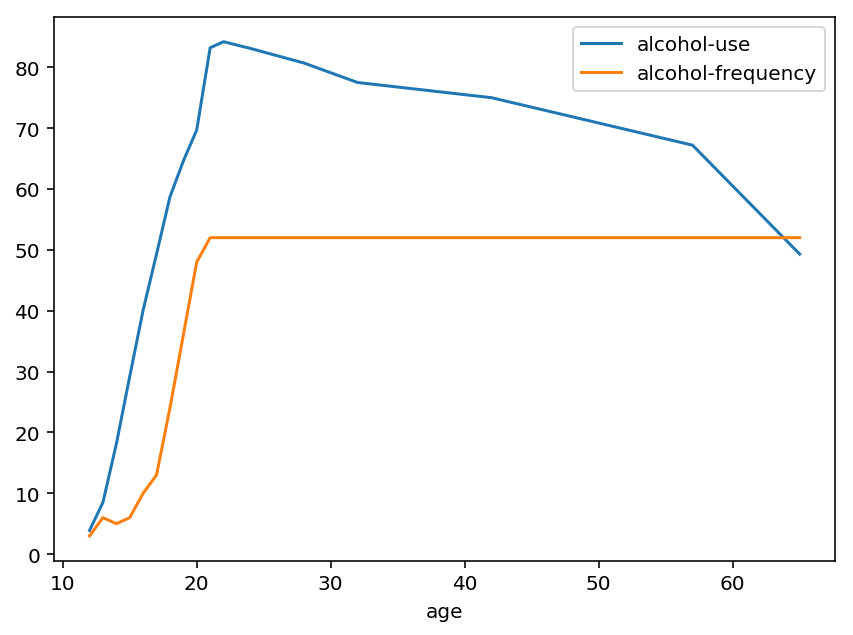

In [42]:
# How 'alcohol-use' and 'alcohol-frequency' change along 'age' 
drug_use.plot(x='age',y=['alcohol-use','alcohol-frequency'],figsize = (7,5))

"""
The plot shows that there is a "peek" at around age 22 that the samples have both highest "alcohol-use" percentage 
and highest 'alchol-frequency'.
"""

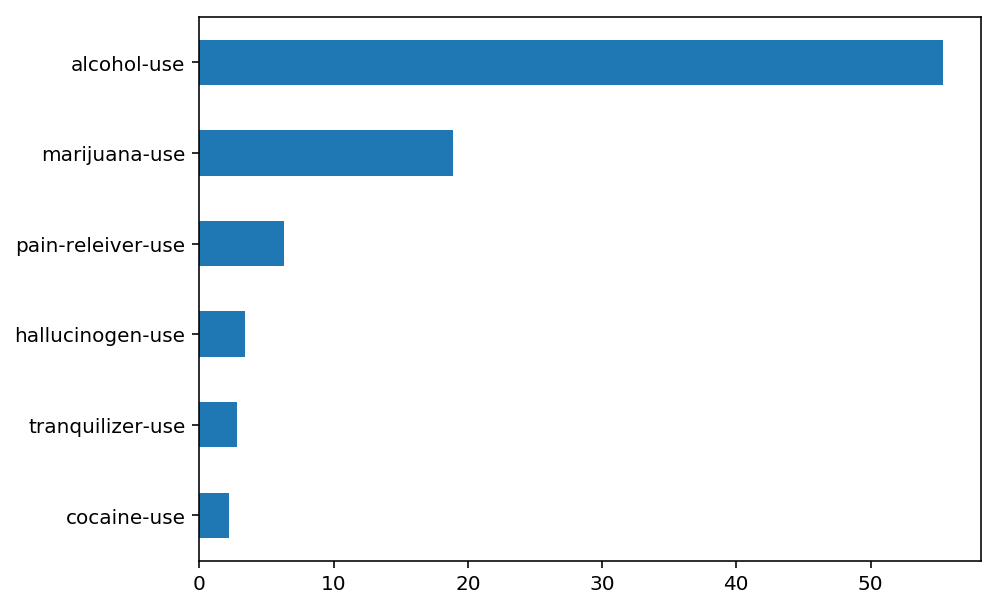

In [43]:
# What are the top 5 drugs (except alcohol) that people used the most(in terms of average use percentage)?
use_subset.mean(axis=0).sort_values(ascending=True).tail(6).plot(kind='barh',figsize = (7,5))

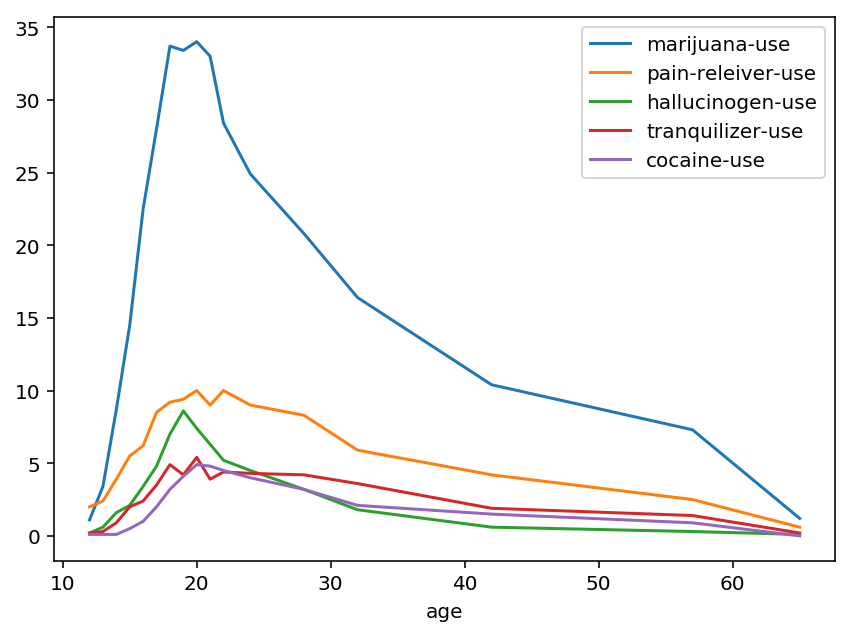

In [44]:
# How the top 5 drugs usage changes along age?
drug_use.plot(x='age',y=['marijuana-use','pain-releiver-use','hallucinogen-use','tranquilizer-use','cocaine-use'],
             figsize = (7,5))

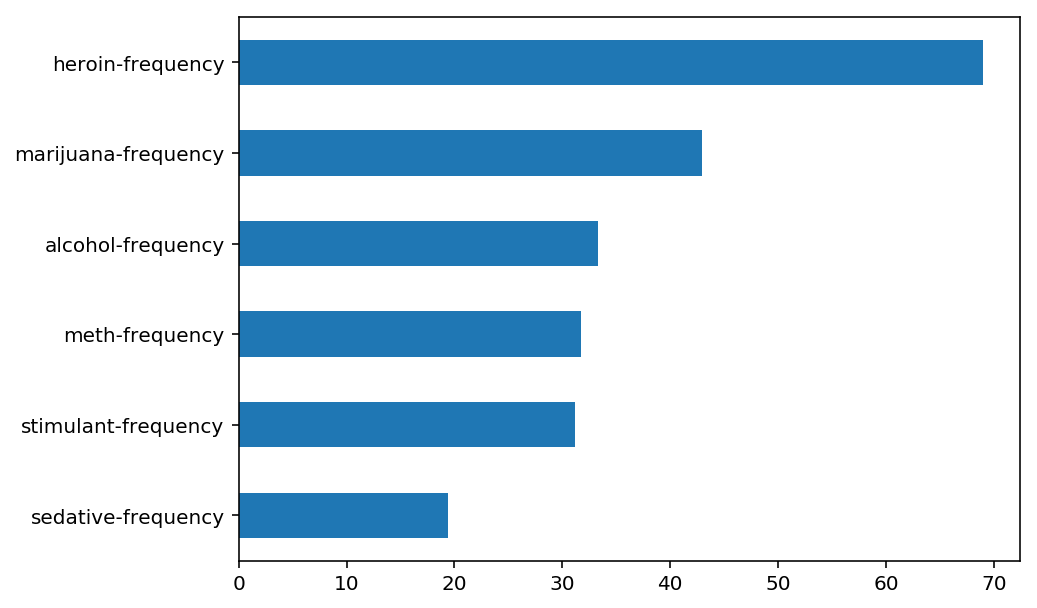

In [45]:
# What are the top 5 drugs (except alcohol) base on use frequency?
frequency_subset.mean(axis=0).sort_values(ascending=True).tail(6).plot(kind='barh', figsize = (7,5))

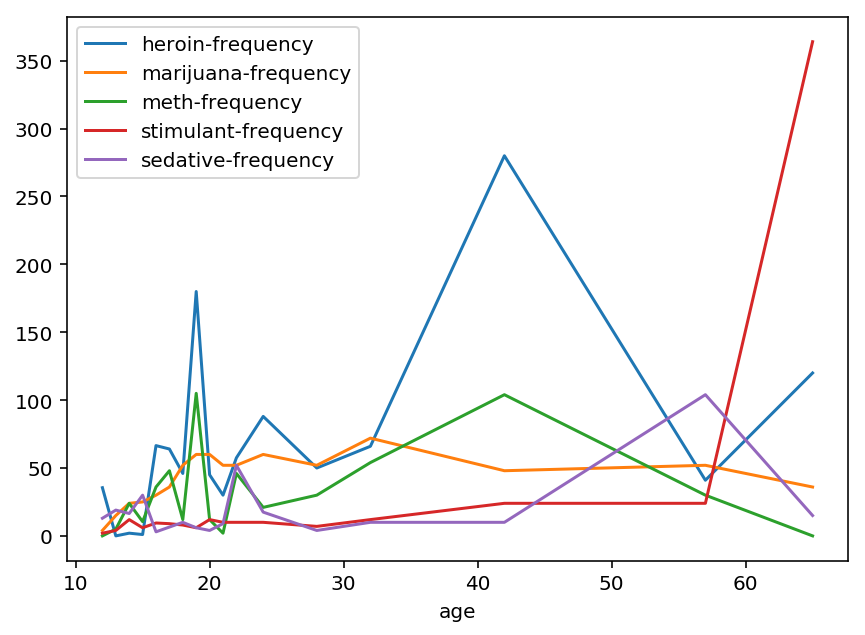

In [46]:
# How the top 5 drugs frequencies change along age?
drug_use.plot(x='age',y=['heroin-frequency','marijuana-frequency','meth-frequency',
                         'stimulant-frequency','sedative-frequency'],figsize = (7,5))

In [47]:
# Have a look at the correlations between different kinds of drugs and age
subset_without_frequency.corr()

,age,n,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
age,1.000000,0.290937,0.365050,-0.382262,-0.190163,0.145883,-0.205031,-0.419710,-0.802827,-0.440993,-0.391452,-0.256160,-0.409823,-0.271172,-0.360167
n,0.290937,1.000000,0.310512,-0.169007,-0.021565,0.281797,0.007798,-0.295302,-0.368395,-0.083587,-0.166039,-0.071086,-0.201621,-0.063571,-0.119997
alcohol-use,0.365050,0.310512,1.000000,0.594165,0.773458,0.877378,0.677614,0.463702,-0.648248,0.617523,0.589219,0.735785,0.582241,0.682531,0.318268
marijuana-use,-0.382262,-0.169007,0.594165,1.000000,0.883789,0.620670,0.711613,0.959353,0.127336,0.966226,0.971733,0.935199,0.968096,0.870446,0.616766
cocaine-use,-0.190163,-0.021565,0.773458,0.883789,1.000000,0.835727,0.899944,0.855668,-0.214609,0.906638,0.865626,0.920430,0.923954,0.889353,0.461914
crack-use,0.145883,0.281797,0.877378,0.620670,0.835727,1.000000,0.750790,0.556222,-0.543499,0.652764,0.603003,0.772651,0.618008,0.694324,0.438421
heroin-use,-0.205031,0.007798,0.677614,0.711613,0.899944,0.750790,1.000000,0.683674,-0.215961,0.805868,0.775321,0.818583,0.808024,0.816620,0.333649
hallucinogen-use,-0.419710,-0.295302,0.463702,0.959353,0.855668,0.556222,0.683674,1.000000,0.173030,0.909333,0.916777,0.862900,0.940008,0.780071,0.518700
inhalant-use,-0.802827,-0.368395,-0.648248,0.127336,-0.214609,-0.543499,-0.215961,0.173030,1.000000,0.092045,0.110492,-0.103745,0.108381,-0.059903,0.110611
pain-releiver-use,-0.440993,-0.083587,0.617523,0.966226,0.906638,0.652764,0.805868,0.909333,0.092045,1.000000,0.976445,0.959283,0.961484,0.918051,0.636666


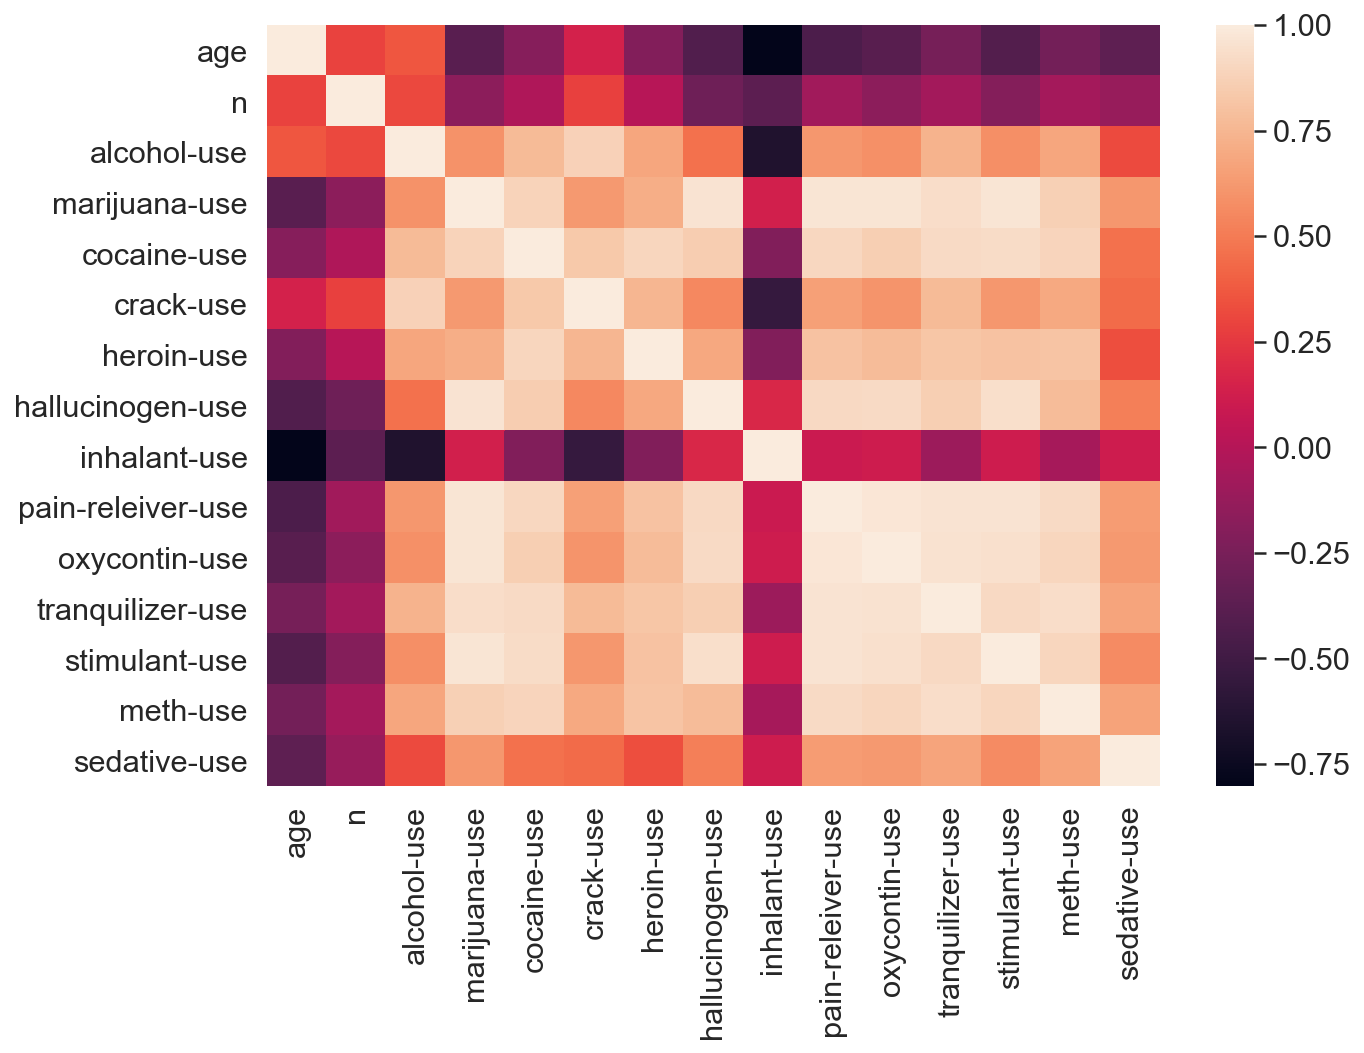

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = subset_without_frequency.corr()
sns.set(font_scale=1.4) 
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(correlation, ax = ax)

#### Overview of the dataset
Base on a high-level, initial overview of the data, there are some inference as follow:
1. Alcohol and marijuana were the most commonly used drugs among all age groups.
2. The top 5 popular drugs (In terms of the Percentage of people who has used them in the past 12 months) are 'marijuana','pain-releiver','hallucinogen', 'tranqullizer' and 'cocaine'
3. The top 5 drugs that people among all age groups used most frequently are 'heroin','marijuana','meth','stimulant' and 'sedative'.
4. When we have a look the drugs use percentage among different age group, people at 20-22 years old use drugs the most. 
5. There are some strong correlations among those prescript drugs such as 'pain-releive','oxycontin','tranquilizer','stimulant','meth' and 'sedative'.
6. In terms of drug use frequency, People at around 40 use 'heroin' the most, and People at around 60 use 'stimulant' the most.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

### Question: Was pain-reliever the most commonly used prescription drug among all types of prescription drugs?

### Background (Why I interested in this question): 
Prescription drugs are widely spread all over the world. Although they were used in medical purposes, they were also often used in entertainment. Prescription drugs can seem being safer when compare to hard street drugs. However, people might not realize that if overdose or misused, prescription drugs can do a great deal of damage to people. Moreover, many prescription drugs are highly addictive. According to the National Institute on Drug Abuse, prescription drugs are the third most commonly abused substances among Americans age 14 and older (The first two are alcohol and marijuana). Additionally, base on the correlation matrix and the seaborn heatmap I've done in the previous initial overview of the dataset, it looks there are some strong positive correlations exist between the prescription drugs. Therefore I am interested in looking into the prescription drugs use in this dataset, and find out which drug are used the most, and might have higer risk of causing additive and abuse compare to the other prescription drugs. 

### Hypothesis (H1):
Pain-reliever was the most commonly used prescription drug.(There were obvious differences between the use of pain-reliever and the uses of other types of prescription drugs)

### Definetions for this ananlysis purpose:

#### Age groups:
Teenager: Age under 18\
Youth: Age from 18 to 24\
Young Adult: Age from 25 to 35\
Middle Age: Age from 35 to 64\
Senior: equals or older than 65\
In this dataset: \
An average age '42' represent a sample age group '35-49',\
An average age '57' represent a sample age group '50-64',\
An average age '65' represent equals or above 65

#### Prescription drugs: 
A prescription drug (also prescription medication or prescription medicine) is a pharmaceutical drug that legally requires a medical prescription to be dispensed.(-Wikipedia.org)


### Prescription drugs in this dataset: 
The following drugs in this dataset are defined as prescription drugs for analysis purpose:
#### pain-releiver: 
Pain relievers are medicines that reduce or relieve headaches, sore muscles, arthritis, or other aches and pains. There are two types of pain-releivers, either Over-the-counter (OTC) or prescription.
#### oxycontin: 
An opioid medication used for treatment of moderate to severe pain.
#### tranquilizer: 
A tranquilizer refers to a drug which is designed for the treatment of anxiety, fear, tension, agitation, and disturbances of the mind, specifically to reduce states of anxiety and tension.
#### stimulant: 
An overarching term that covers many drugs including those that increase activity of the central nervous system and the body, drugs that are pleasurable and invigorating, or drugs that have sympathomimetic effects. Stimulants are widely used throughout the world as prescription medicines as well as without a prescription (either legally or illicitly) as performance-enhancing or recreational drugs.
#### meth: 
A short for  Methamphetamine, and also known as ice drug. It is a powerful, highly addictive stimulant that affects the central nervous system. As a prescription medication, it is used to treat attention deficit hyperactivity disorder.\
#### sedative: 
A substance that induces sedation by reducing irritability or excitement.

#### Prescription drugs abuse: 
Prescription drug abuse is the use of a prescription medication in a way not intended by the prescribing doctor. 

ps. The above definitions and descriptions are from Wikipedia.org and some other medical websites.

### The deliverables will answer the following questions:
1. What prescription drug was used by highest percentage of people in the past 12 months? 
2. How prescription drugs were used among different age groups?
3. If an obvious difference exist on drugs use among different age groups?
4. Why we should pay attention to prescription drugs abuse? What age groups should we pay more attention on?

In [49]:
# Generate some data subsets that only cover the defined prescription drugs
# A full prescription drugs subset
P_drugs_full= drug_use.filter(regex=('^(age|pain|oxycontin|tranquilizer|stimulant|meth|sedative)'))
P_drugs_full.head()

,age,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [50]:
# Add a new column 'age_group' for analysis purpose
def ageString(age):
    if age < 18:
        return 'Teenager'
    elif age < 25:
        return 'Youth'
    elif age < 40:
        return 'Young Adult'
    elif age < 60:
        return 'Middle Age'
    else:
        return 'Senior'
P_drugs_grouped = P_drugs_full.copy()
P_drugs_grouped['age_group'] = P_drugs_grouped.apply(lambda row: ageString(row.age), axis=1)
P_drugs_grouped

# Using P_drugs_full['age_group'] = ... will cause a WARNING, that is because 
# P_drugs_full is a subview of another bigger dataframe, and you are modifying this subview
# Using a copy avoid a subview issue, but copying could be slow if dataframe is large

,age,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,age_group
0,12,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0,Teenager
1,13,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0,Teenager
2,14,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5,Teenager
3,15,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0,Teenager
4,16,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0,Teenager
5,17,8.5,9.0,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5,Teenager
6,18,9.2,12.0,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0,Youth
7,19,9.4,12.0,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0,Youth
8,20,10.0,10.0,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0,Youth
9,21,9.0,15.0,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0,Youth


In [51]:
# Set the column 'age' as index
P_drugs_grouped.set_index('age', inplace=True)
P_drugs_grouped.head()

,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,age_group
age,,,,,,,,,,,,,
12,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0,Teenager
13,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0,Teenager
14,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5,Teenager
15,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0,Teenager
16,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0,Teenager


In [52]:
#  A subset that includes only drugs use
P_drugs_grouped_use = P_drugs_grouped.filter(regex=('^(age.*|.*use)$'))
P_drugs_grouped_use

,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use,age_group
age,,,,,,,
12,2.0,0.1,0.2,0.2,0.0,0.2,Teenager
13,2.4,0.1,0.3,0.3,0.1,0.1,Teenager
14,3.9,0.4,0.9,0.8,0.1,0.2,Teenager
15,5.5,0.8,2.0,1.5,0.3,0.4,Teenager
16,6.2,1.1,2.4,1.8,0.3,0.2,Teenager
17,8.5,1.4,3.5,2.8,0.6,0.5,Teenager
18,9.2,1.7,4.9,3.0,0.5,0.4,Youth
19,9.4,1.5,4.2,3.3,0.4,0.3,Youth
20,10.0,1.7,5.4,4.0,0.9,0.5,Youth


In [53]:
#  A subset that only includes drug use frequency
P_drugs_grouped_frequency = P_drugs_grouped.filter(regex=('^(age.*|.*frequency)$'))
P_drugs_grouped_frequency

,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency,age_group
age,,,,,,,
12,36.0,24.5,52.0,2.0,0.0,13.0,Teenager
13,14.0,41.0,25.5,4.0,5.0,19.0,Teenager
14,12.0,4.5,5.0,12.0,24.0,16.5,Teenager
15,10.0,3.0,4.5,6.0,10.5,30.0,Teenager
16,7.0,4.0,11.0,9.5,36.0,3.0,Teenager
17,9.0,6.0,7.0,9.0,48.0,6.5,Teenager
18,12.0,7.0,12.0,8.0,12.0,10.0,Youth
19,12.0,7.5,4.5,6.0,105.0,6.0,Youth
20,10.0,12.0,10.0,12.0,12.0,4.0,Youth


In [54]:
P_drugs_grouped_use.mean()

pain-releiver-use    6.270588
oxycontin-use        0.935294
tranquilizer-use     2.805882
stimulant-use        1.917647
meth-use             0.382353
sedative-use         0.282353
dtype: float64

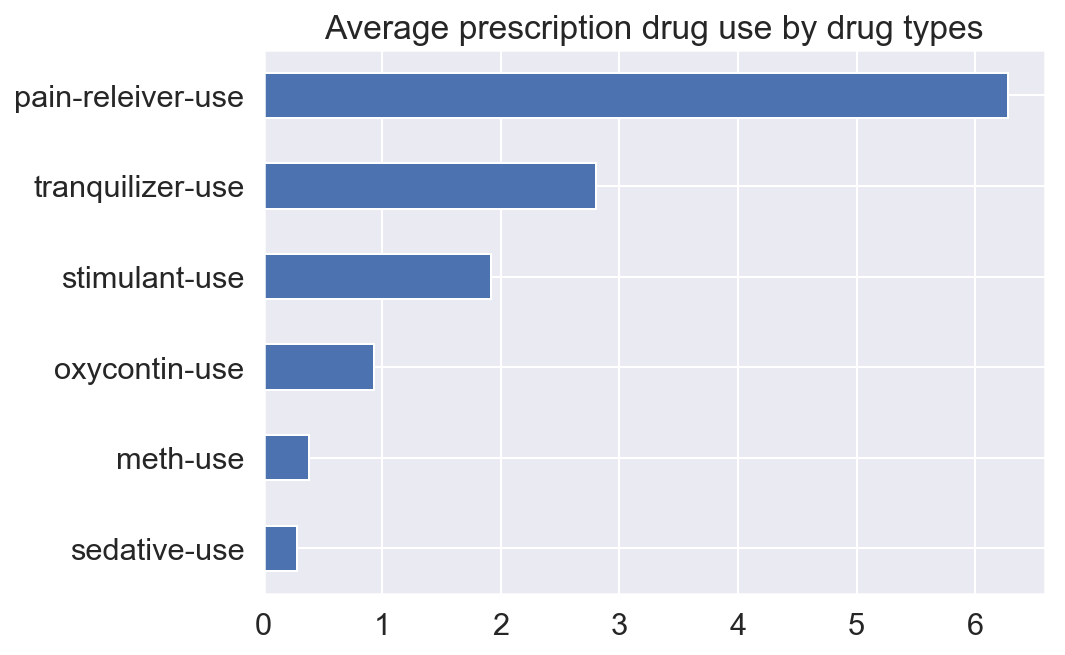

In [55]:
# Plot the average drugs use by different types of drugs
P_drugs_grouped_use.mean().sort_values(ascending=True).plot(kind='barh', figsize=(7,5), \
                                               title='Average prescription drug use by drug types')

In [56]:
# Check the average drug use for each drugs by different age groups
P_drugs_grouped_use.groupby('age_group').mean()

,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
age_group,,,,,,
Middle Age,3.350000,0.350000,1.650000,0.450000,0.200000,0.250000
Senior,0.600000,0.000000,0.200000,0.000000,0.000000,0.000000
Teenager,4.750000,0.650000,1.550000,1.233333,0.233333,0.266667
Young Adult,7.100000,1.050000,3.900000,1.850000,0.500000,0.400000
Youth,9.433333,1.533333,4.516667,3.433333,0.616667,0.316667


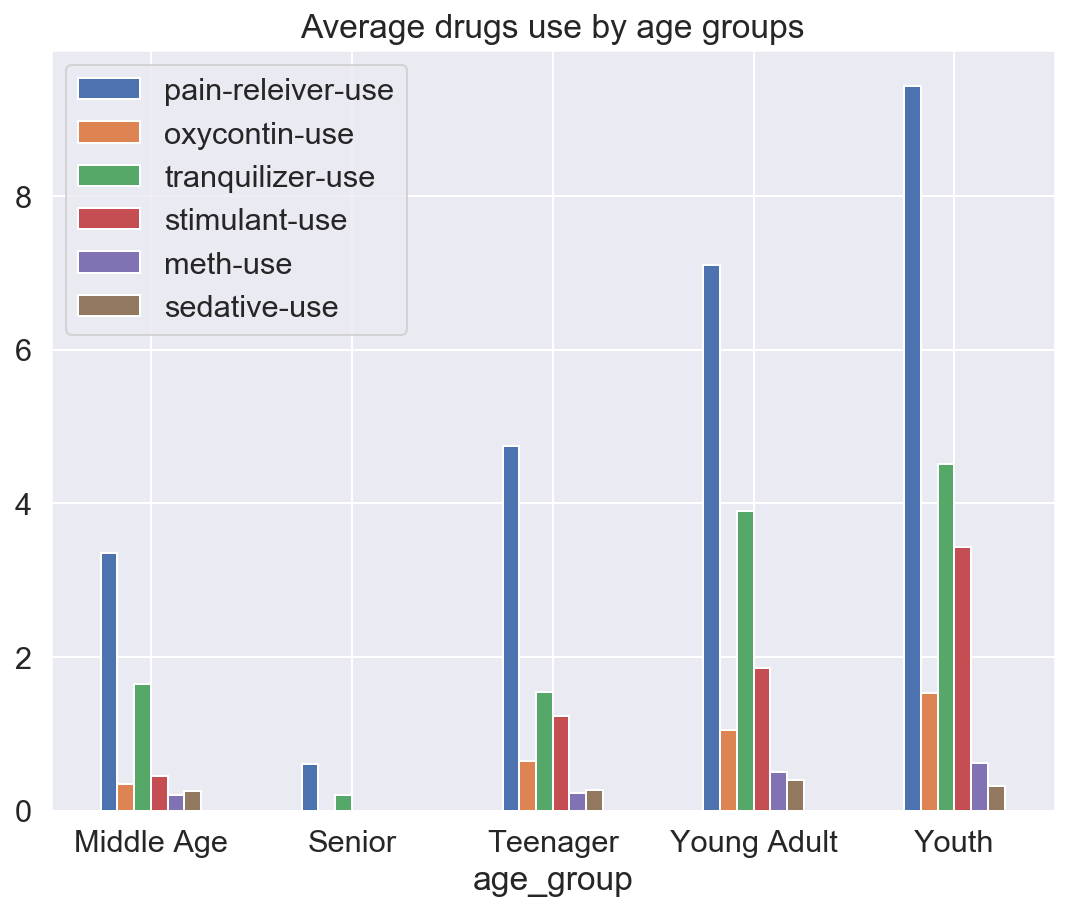

In [57]:
# Plot the average drugs use by different age groups
P_drugs_grouped_use.groupby('age_group').mean().plot(kind='bar', figsize=(9,7), rot=0, title='Average drugs use by age groups')

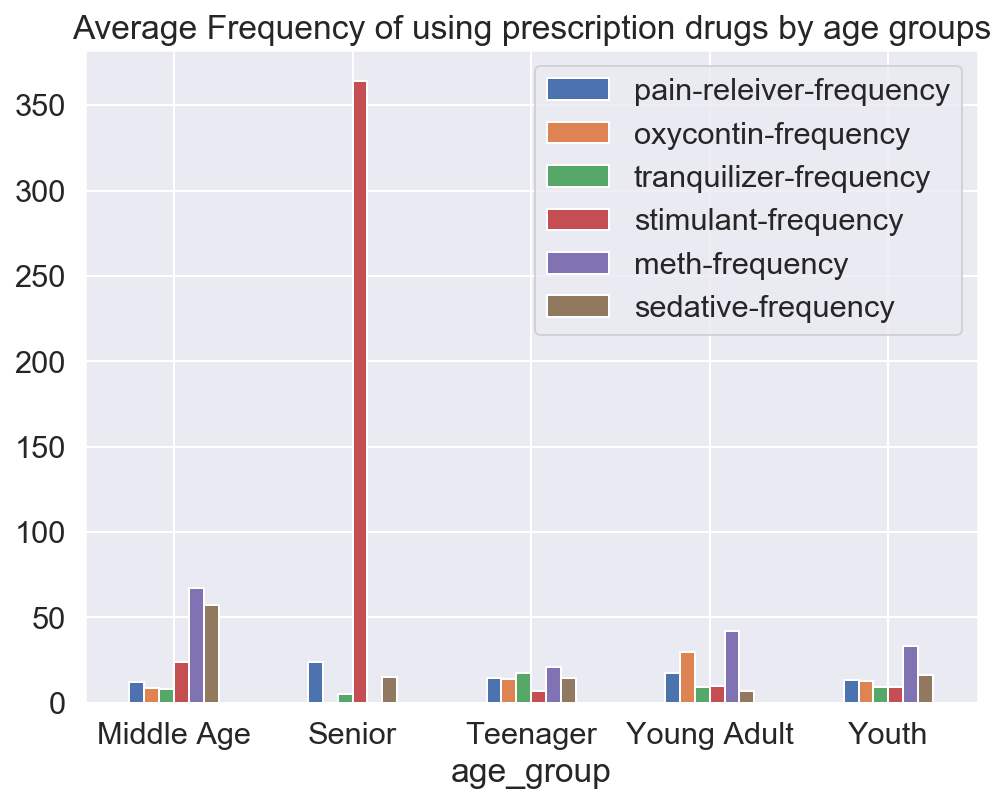

In [58]:
# Plot the average drugs frequency group by different age groups
P_drugs_grouped_frequency.groupby('age_group').mean().plot(kind='bar', figsize=(8,6), rot=0,\
                                              title='Average Frequency of using prescription drugs by age groups')

In [59]:
# Check the average frequency of drug use by different types of drugs
P_drugs_grouped_frequency.mean()

pain-releiver-frequency    14.705882
oxycontin-frequency        13.941176
tranquilizer-frequency     11.735294
stimulant-frequency        31.147059
meth-frequency             31.735294
sedative-frequency         19.382353
dtype: float64

### Report
1. Base on the overall average percentage of people who used prescription drugs in the past 12 months, average 6.27% of people (included all age groups) used Pain-reliever, this percentage is more than twice of the percentage of tranquilizer (the second place of drug). This means among those prescription drugs, pain-reliever was much more commonly used by people.
2. Base on a bar chart that shows the percentage of drugs use by different age groups, I found that within each age group, percentage of pain-reliever was much higher than other types of prescription drugs without exception. This means pain-reliever was the most commonly used prescription drugs by sample people no matter what age they were.
3. Base on the average frequency of using prescription drugs by age groups, the average frequency of using pain-reliever is less than some other drugs like stimulant, meth and sedative. This means pain-reliever might has lower risk of addiction compare to some other types of prescription drugs.
4. According to the average drug use by different age groups, average 9.43% of people who was age between 25-35 used pain-reliever, 7.1% for people age between 18-25, and 4.75% for people age under 18. These percentages were much higher than those people who were older. This means young people more relied on pain-reliever than older people. This might indicate some levels of pain-reliever drug abuse among young people. Because usually young people should has lower level of psysical pain issue than older people, however the dataset shows young people use pain-reliever more than older people.
5. To sum up, pain-reliever was the most commonly used prescription drugs for people across all age groups. Although it appears to have lower risk of causing addiction compared to some other types of prescription drugs, there is room for pain-reliever drug abuse, which can be a severe issue. We should pay attention to pain-reliever use among young people, becasue base on the dataset, young people (age under 35) were much more inclined to use pain-reliever than older people(age above 35).